# Carga de Librerias


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples, adjusted_rand_score
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.utils import resample


# Carga de Datos

In [2]:
# Cargar el archivo codificado
ruta = '/content/drive/MyDrive/ActiveMind/ActiveMind_Responses_Codificados.xlsx'
df = pd.read_excel(ruta)

# Mostrar las primeras filas
print("Vista previa de los datos:")
df.head()

Vista previa de los datos:


,Timestamp,Edad:,Género:,¿Cuál es tu nivel de actividad física semanal?,¿Qué tipo de actividad física realizas con más frecuencia? (Selecciona hasta 3),En caso de haber seleccionado otro en la pregunta anterior:,¿Qué importancia tiene para ti la salud mental en tu rutina de ejercicio?,¿Usas alguna dispositivo tecnológico para hacer ejercicio o mejorar tu bienestar?,¿Qué función te gustaría que tuviera una app para mejorar tu bienestar físico y mental? (Selecciona hasta 3 opciones),¿Cuál es tu principal motivación para hacer ejercicio?,¿Cuanto tiempo duran en promedio tus sesiones de ejercicio?,¿Qué te impide hacer más ejercicio del que te gustaría? (Selecciona hasta 2 opciones),¿Qué tan cómodo te sentirías si una app personalizara tu música y entrenamientos según tu estado de ánimo?,¿Qué tipo de música prefieres para hacer ejercicio? (Selecciona hasta 2 opciones),En caso de haber seleccionado otra en la pregunta anterior:,"Si existiera una app que integre ejercicio, salud mental y personalización musical con IA, ¿estarías interesado/a en probarla?",¿Qué elemento te motivaría más a usar una app de bienestar?,¿Tienes alguna sugerencia o comentario sobre cómo debería ser esta app para que se adapte mejor a tus necesidades? (Respuesta abierta)
0,2025-02-21,18-24 años,1,1,Yoga/Pilates,NaN,2,1,La musica se adapte según los valores registra...,Mejorar mi estado físico,30 - 60 minutos,"Falta de motivación, No sé qué tipo de ejercic...",2,Otra,Reguetón,2,Planes personalizados según mi estado de ánimo,NaN
1,2025-02-21,18-24 años,0,2,"Cardio (correr, bicicleta, natación), Entrenam...",NaN,2,1,La musica se adapte según los valores registra...,Mejorar mi estado físico,30 - 60 minutos,"Falta de tiempo, Falta de motivación, Falta de...",4,"Pop, Hip-hop/Rap, Otra",Reguetón,2,Planes personalizados según mi estado de ánimo,NaN
2,2025-02-21,18-24 años,1,1,"Cardio (correr, bicicleta, natación)",NaN,2,1,"Gamificación y retos para motivarme, Análisis ...",Mejorar mi estado físico,30 - 60 minutos,Falta de tiempo,2,"Rock, Otra",Reguetón,4,Planes personalizados según mi estado de ánimo,NaN
3,2025-02-21,18-24 años,1,2,"Cardio (correr, bicicleta, natación), Entrenam...",NaN,2,0,Recomendaciones de música adaptadas a mi estad...,Tener más energía en mi día a día,30 - 60 minutos,Falta de tiempo,4,"Electrónica/Dance, Pop",NaN,4,Retos y recompensas (gamificación),NaN
4,2025-02-21,18-24 años,1,2,"Cardio (correr, bicicleta, natación), Entrenam...",NaN,4,0,"Gamificación y retos para motivarme, Análisis ...",Mejorar mi estado físico,30 - 60 minutos,Falta de tiempo,2,"Electrónica/Dance, Pop, Rock",NaN,2,Integración con mis dispositivos actuales,NaN


# Visualización Inicial

In [3]:
print("\nInformación general del dataset:")
df.info()

# Estadísticas descriptivas
print("\nDescripción estadística:")
print(df.describe())

# Mapa de calor para ver correlaciones
# Seleccionamos solo las columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

def guardar_mapa_calor(df_numerico, nombre_archivo='mapa_calor.png'):
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_numerico.corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Mapa de Correlaciones entre Variables Numéricas')
    plt.tight_layout()
    plt.savefig(nombre_archivo, dpi=300)
    plt.close()
    print(f"Mapa de calor guardado como: {nombre_archivo}")
df_numerico = df.select_dtypes(include=['number'])
guardar_mapa_calor(df_numerico)


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 18 columns):
 #   Column                                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                                  --------------  ----- 
 0   Timestamp                                                                                                                               157 non-null    object
 1   Edad:                                                                                                                                   157 non-null    object
 2   Género:                                                                                                                                 157 non-null    int64 
 3   ¿Cuál es tu nivel de actividad físic

/tmp/ipython-input-3-1941317965.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


Mapa de calor guardado como: mapa_calor.png


# Exploración de Datos (Clustering)


Aplicando Clustering Jerárquico...


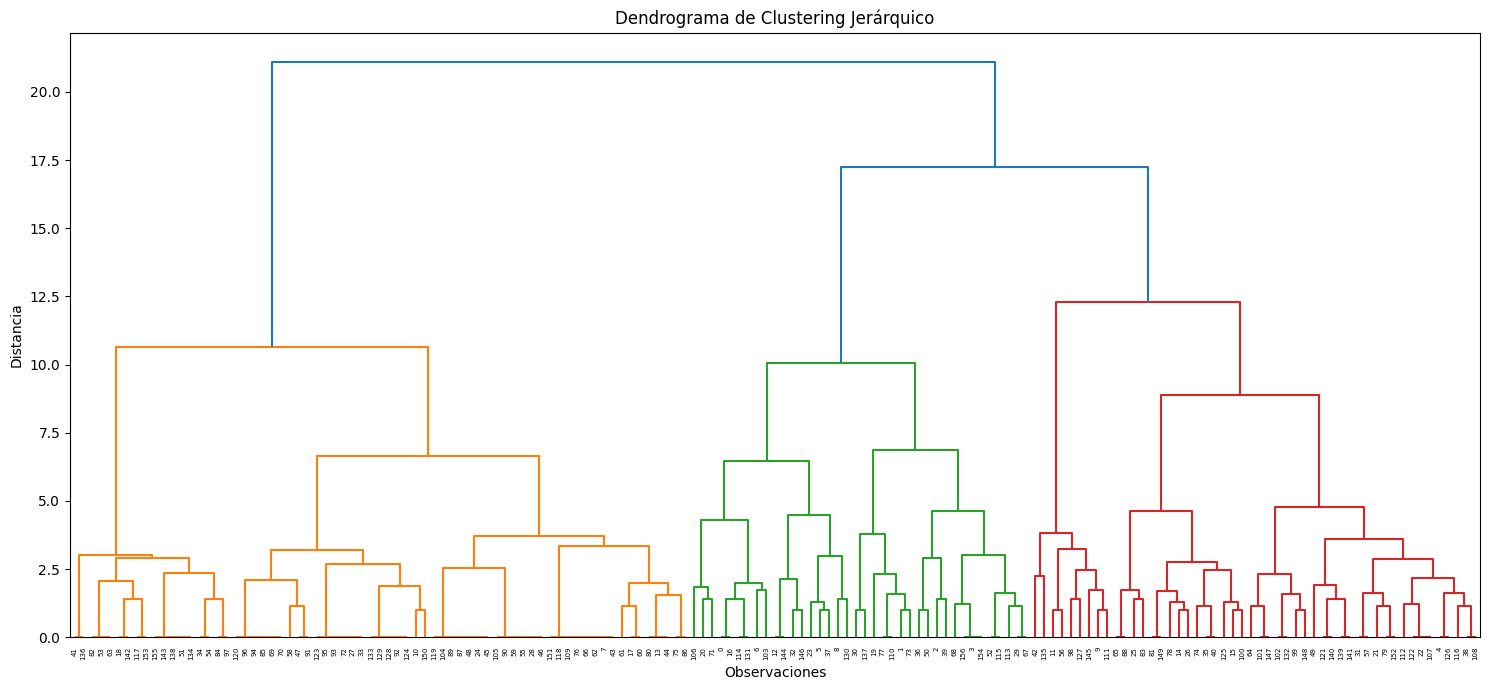

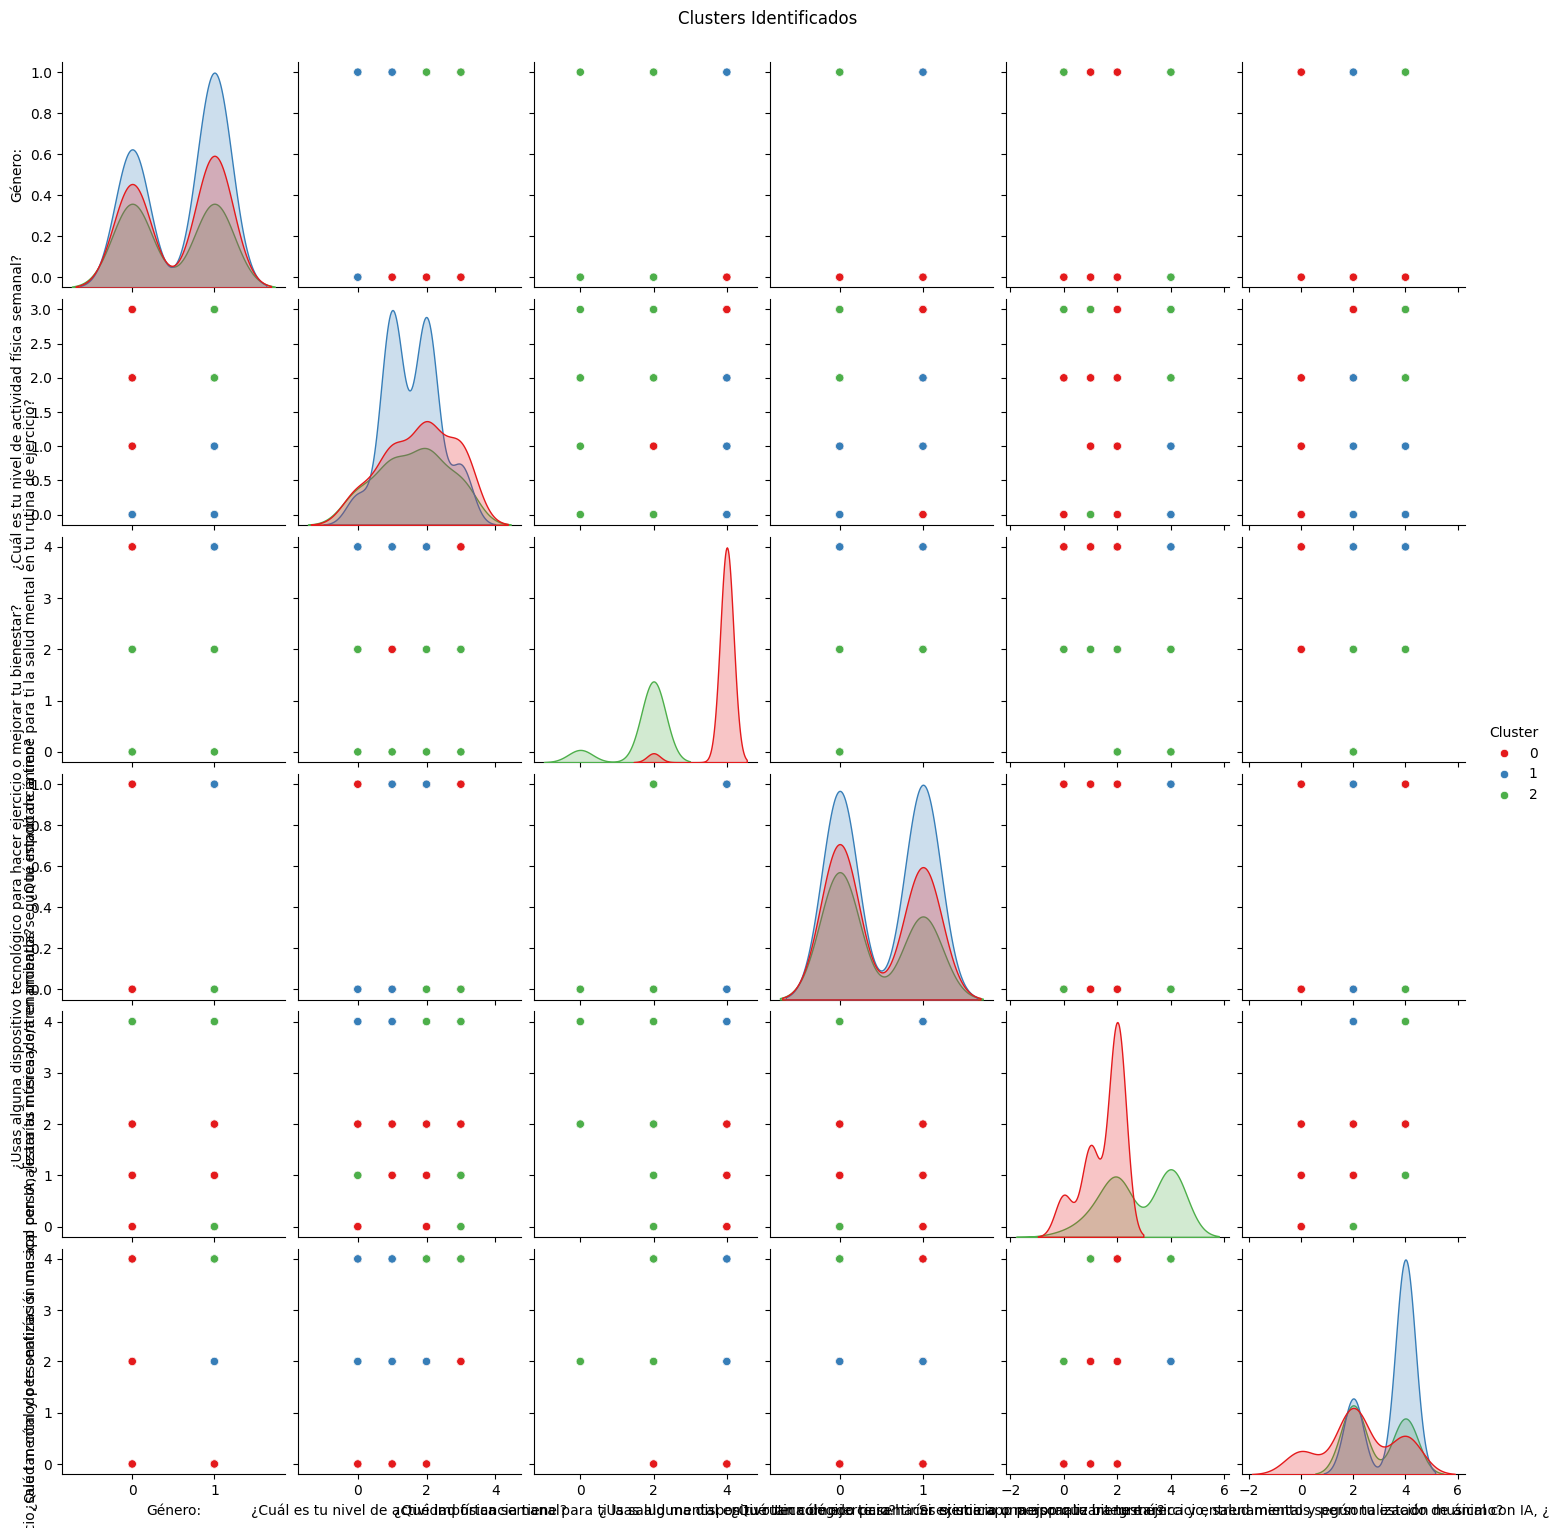

In [4]:
# Clustering Jerárquico (no K-means)
print("\nAplicando Clustering Jerárquico...")

# Crear linkage matrix para el dendrograma
linked = linkage(df_numerico, method='ward')

# Dendrograma
plt.figure(figsize=(15, 7))
dendrogram(linked)
plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
plt.tight_layout()
plt.savefig("dendrograma_clustering.png", dpi=300)
plt.show()

# Crear los clusters (por ejemplo, 3 clusters)
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Cluster'] = cluster.fit_predict(df_numerico)

# Visualización de clusters (si hay muchas variables, hacer PCA)
plot = sns.pairplot(df_numerico.assign(Cluster=df['Cluster']), hue='Cluster', palette='Set1')
plot.fig.suptitle('Clusters Identificados', y=1.02)
plot.savefig("pairplot_clusters.png", dpi=300)
plt.show()

In [23]:
print("\nInformación general del dataset:")
df.info()

print("\nDescripción estadística:")
print(df.describe())

# ===============================================
# Seleccionar solo columnas numéricas y escalar
# ===============================================
df_numerico = df.select_dtypes(include=['number'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numerico)

# ===============================================
# MÉTODO DEL CODO Y SILUETA PROMEDIO
# ===============================================
siluetas = []
inercia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inercia.append(kmeans.inertia_)
    siluetas.append(silhouette_score(X_scaled, labels))

# Gráfico método del codo
plt.figure(figsize=(10,5))
plt.plot(K_range, inercia, marker='o')
plt.title('Método del Codo - KMeans')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.tight_layout()
plt.savefig("metodo_del_codo.png", dpi=300)
plt.close()

# Gráfico silhouette promedio
plt.figure(figsize=(10,5))
plt.plot(K_range, siluetas, marker='s', color='green')
plt.title('Coeficiente de Silueta Promedio por K')
plt.xlabel('Número de clusters')
plt.ylabel('Silueta promedio')
plt.tight_layout()
plt.savefig("silueta_promedio_kmeans.png", dpi=300)
plt.close()

# ===============================================
# SILHOUETTE ANALYSIS PLOT POR CLUSTER (ejemplo K=3)
# ===============================================
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
silhouette_vals = silhouette_samples(X_scaled, cluster_labels)

plt.figure(figsize=(10,7))
y_lower = 10
for i in range(3):
    ith_cluster_silhouette_values = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
plt.title("Silhouette Plot por Cluster (K=3)")
plt.xlabel("Coeficiente de Silueta")
plt.ylabel("Clusters")
plt.tight_layout()
plt.savefig("silhouette_plot_clusters.png", dpi=300)
plt.close()

# ===============================================
# CLUSTERING JERÁRQUICO
# ===============================================
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(15, 7))
dendrogram(linked)
plt.title('Dendrograma Clustering Jerárquico (Ward)')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
plt.tight_layout()
plt.savefig("dendrograma_clustering.png", dpi=300)
plt.close()

# ===============================================
# ASIGNAR CLUSTERS (Agglomerative)
# ===============================================
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Cluster'] = cluster.fit_predict(X_scaled)

# ===============================================
# CARACTERIZACIÓN DESCRIPTIVA DE CLUSTERS + INSIGHTS
# ===============================================
for i in df['Cluster'].unique():
    print(f"\n🔷 Cluster {i} - Descripción estadística y posibles insights:")
    cluster_df = df[df['Cluster'] == i]
    display(cluster_df.describe())

    # Visualización boxplot para variables numéricas
    plt.figure(figsize=(12,6))
    sns.boxplot(data=cluster_df.select_dtypes(include='number'))
    plt.title(f'Distribución de variables numéricas - Cluster {i}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"distribucion_cluster_{i}.png", dpi=300)
    plt.close()

    # Insight básico (extiende en tu interpretación académica)
    print(f"Cluster {i} parece tener {len(cluster_df)} observaciones con medias destacadas en variables clave.\n")

# ===============================================
# VALIDACIÓN ROBUSTA: Bootstrap clustering stability
# ===============================================
n_iterations = 30
ari_scores = []

for i in range(n_iterations):
    X_resampled, y_resampled = resample(X_scaled, df['Cluster'], random_state=i)
    kmeans_boot = KMeans(n_clusters=3, random_state=42)
    labels_boot = kmeans_boot.fit_predict(X_resampled)
    ari = adjusted_rand_score(y_resampled, labels_boot)
    ari_scores.append(ari)

print("\n🔷 Validación robusta de clustering:")
print(f"ARI promedio (estabilidad): {np.mean(ari_scores):.3f}")
print(f"Desviación estándar del ARI: {np.std(ari_scores):.3f}")

# ===============================================
# PCA para reducción de dimensionalidad y visualización
# ===============================================
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df['pca1'] = pca_result[:,0]
df['pca2'] = pca_result[:,1]

plt.figure(figsize=(10,7))
sns.scatterplot(x='pca1', y='pca2', hue='Cluster', data=df, palette='Set1')
plt.title('Visualización PCA (2D) por Clusters')
plt.tight_layout()
plt.savefig("pca_clusters.png", dpi=300)
plt.close()

# ===============================================
# CLASIFICADORES MULTIMODELO (≈100 modelos)
# ===============================================
X = X_scaled
y = df['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=500)
}

param_grid = {
    'RandomForest': {'n_estimators': [50,100], 'max_depth': [5,10,None]},
    'GradientBoosting': {'n_estimators': [50,100], 'learning_rate':[0.01,0.1]},
    'SVM': {'C':[0.1,1,10], 'kernel':['linear','rbf']},
    'KNN': {'n_neighbors': [3,5,7]},
    'LogisticRegression': {'C':[0.1,1,10]}
}

results = []

for name, model in models.items():
    print(f"\nEntrenando modelo: {name}")
    grid = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    acc = grid.score(X_test, y_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    prec = precision_score(y_test, y_pred, average='weighted')
    results.append({
        'Modelo': name,
        'Mejor_Params': grid.best_params_,
        'Accuracy': round(acc,3),
        'F1-score': round(f1,3),
        'Recall': round(rec,3),
        'Precision': round(prec,3)
    })

    # Matriz de confusión para anexos
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Matriz de Confusión - {name}')
    plt.tight_layout()
    plt.savefig(f"confusion_matrix_{name}.png", dpi=300)
    plt.close()



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 21 columns):
 #   Column                                                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                                                  --------------  -----  
 0   Timestamp                                                                                                                               157 non-null    object 
 1   Edad:                                                                                                                                   157 non-null    object 
 2   Género:                                                                                                                                 157 non-null    int64  
 3   ¿Cuál es tu nivel de actividad 

,Género:,¿Cuál es tu nivel de actividad física semanal?,¿Qué importancia tiene para ti la salud mental en tu rutina de ejercicio?,¿Usas alguna dispositivo tecnológico para hacer ejercicio o mejorar tu bienestar?,¿Qué tan cómodo te sentirías si una app personalizara tu música y entrenamientos según tu estado de ánimo?,"Si existiera una app que integre ejercicio, salud mental y personalización musical con IA, ¿estarías interesado/a en probarla?",Cluster,pca1,pca2
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.0,38.000000,38.000000
mean,0.500000,1.605263,1.736842,0.394737,2.789474,2.894737,2.0,1.991083,-1.766340
std,0.506712,1.001066,0.685140,0.495355,1.233713,1.007793,0.0,0.810703,1.276866
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.0,0.080728,-4.629584
25%,0.000000,1.000000,2.000000,0.000000,2.000000,2.000000,2.0,1.241488,-2.720468
50%,0.500000,2.000000,2.000000,0.000000,2.000000,2.000000,2.0,2.132363,-1.663593
75%,1.000000,2.000000,2.000000,1.000000,4.000000,4.000000,2.0,2.713592,-0.698517
max,1.000000,3.000000,2.000000,1.000000,4.000000,4.000000,2.0,3.179295,0.197903


/tmp/ipython-input-23-703325815.py:103: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


Cluster 2 parece tener 38 observaciones con medias destacadas en variables clave.


🔷 Cluster 0 - Descripción estadística y posibles insights:


,Género:,¿Cuál es tu nivel de actividad física semanal?,¿Qué importancia tiene para ti la salud mental en tu rutina de ejercicio?,¿Usas alguna dispositivo tecnológico para hacer ejercicio o mejorar tu bienestar?,¿Qué tan cómodo te sentirías si una app personalizara tu música y entrenamientos según tu estado de ánimo?,"Si existiera una app que integre ejercicio, salud mental y personalización musical con IA, ¿estarías interesado/a en probarla?",Cluster,pca1,pca2
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,50.000000,50.000000
mean,0.560000,1.780000,3.920000,0.460000,1.500000,2.240000,0.0,-2.178556,-0.270658
std,0.501427,0.995705,0.395897,0.503457,0.707107,1.378553,0.0,0.717599,1.339951
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,-3.854485,-4.396298
25%,0.000000,1.000000,4.000000,0.000000,1.000000,2.000000,0.0,-2.618610,-0.987167
50%,1.000000,2.000000,4.000000,0.000000,2.000000,2.000000,0.0,-2.132722,-0.044842
75%,1.000000,3.000000,4.000000,1.000000,2.000000,4.000000,0.0,-1.534175,0.663984
max,1.000000,3.000000,4.000000,1.000000,2.000000,4.000000,0.0,-1.117579,1.800411


/tmp/ipython-input-23-703325815.py:103: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


Cluster 0 parece tener 50 observaciones con medias destacadas en variables clave.


🔷 Cluster 1 - Descripción estadística y posibles insights:


,Género:,¿Cuál es tu nivel de actividad física semanal?,¿Qué importancia tiene para ti la salud mental en tu rutina de ejercicio?,¿Usas alguna dispositivo tecnológico para hacer ejercicio o mejorar tu bienestar?,¿Qué tan cómodo te sentirías si una app personalizara tu música y entrenamientos según tu estado de ánimo?,"Si existiera una app que integre ejercicio, salud mental y personalización musical con IA, ¿estarías interesado/a en probarla?",Cluster,pca1,pca2
count,69.000000,69.000000,69.0,69.000000,69.0,69.000000,69.0,69.000000,69.000000
mean,0.608696,1.579710,4.0,0.507246,4.0,3.478261,1.0,0.482126,1.168895
std,0.491618,0.774707,0.0,0.503610,0.0,0.884652,0.0,0.339413,0.767522
min,0.000000,0.000000,4.0,0.000000,4.0,2.000000,1.0,-0.181415,-0.548163
25%,0.000000,1.000000,4.0,0.000000,4.0,2.000000,1.0,0.129372,0.638219
50%,1.000000,2.000000,4.0,1.000000,4.0,4.000000,1.0,0.588798,1.185430
75%,1.000000,2.000000,4.0,1.000000,4.0,4.000000,1.0,0.727421,1.727739
max,1.000000,3.000000,4.0,1.000000,4.0,4.000000,1.0,0.886881,2.274950


/tmp/ipython-input-23-703325815.py:103: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


Cluster 1 parece tener 69 observaciones con medias destacadas en variables clave.


🔷 Validación robusta de clustering:
ARI promedio (estabilidad): 0.912
Desviación estándar del ARI: 0.188

Entrenando modelo: RandomForest

Entrenando modelo: GradientBoosting

Entrenando modelo: SVM

Entrenando modelo: KNN

Entrenando modelo: LogisticRegression


In [22]:
results_df = results_df[['Modelo', 'Accuracy', 'Mejor_Params']]
results_df['Accuracy'] = results_df['Accuracy'].round(3)

# Generar tabla en formato grid
tabla_str = tabulate(results_df, headers='keys', tablefmt='grid', showindex=False)
print("\nResultados de clasificadores probados (tabla elegante):")
print(tabla_str)

# ===============================================
# Guardar la tabla como imagen PNG para TFM
# ===============================================
def save_table_as_image(tabla_str, filename='resultados_modelos.png'):
    fig, ax = plt.subplots(figsize=(12, len(results_df)*0.6 + 1))
    ax.axis('off')
    plt.text(0, 1, tabla_str, fontsize=10, fontfamily='monospace', va='top')
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()
    print(f"Tabla guardada como imagen: {filename}")

save_table_as_image(tabla_str)


Resultados de clasificadores probados (tabla elegante):
+--------------------+------------+---------------------------------------------+
| Modelo             |   Accuracy | Mejor_Params                                |
+====================+============+=============================================+
| RandomForest       |      0.979 | {'max_depth': 5, 'n_estimators': 50}        |
+--------------------+------------+---------------------------------------------+
| GradientBoosting   |      1     | {'learning_rate': 0.01, 'n_estimators': 50} |
+--------------------+------------+---------------------------------------------+
| SVM                |      1     | {'C': 0.1, 'kernel': 'linear'}              |
+--------------------+------------+---------------------------------------------+
| KNN                |      0.979 | {'n_neighbors': 7}                          |
+--------------------+------------+---------------------------------------------+
| LogisticRegression |      1     | {'C':